<a href="https://colab.research.google.com/github/hugueds/tensorflow-course/blob/master/84_RNN_on_a_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## RNN on a Time **Series**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [9]:
df = pd.read_csv('RSCCASN.csv', parse_dates=True, index_col='DATE')
df.columns = ['Sales']
df.tail()

,Sales
DATE,
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791
2019-09-01,19695
2019-10-01,21113


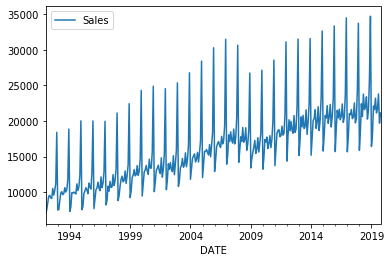

In [10]:
df.plot()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
Sales    334 non-null int64
dtypes: int64(1)
memory usage: 5.2 KB


In [12]:
len(df)

334

In [0]:
test_size = 18
test_index = len(df) - test_size

In [0]:
train = df.iloc[:test_index]
test = df.iloc[test_index:]

In [117]:
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [0]:
length = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)
val_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)


In [120]:
n_features = 1

model = Sequential()

model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
# model.add(Dropout(0.25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.summary()


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 100)               40800     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [0]:
es = EarlyStopping(monitor='val_loss', patience=4)

model.fit_generator(generator, epochs=20, validation_data=val_generator, callbacks=[es])


Epoch 1/20
304/304 [==============================] - 5s 18ms/step - loss: 0.0042 - val_loss: 0.0032
Epoch 2/20
304/304 [==============================] - 6s 18ms/step - loss: 0.0024 - val_loss: 0.0037
Epoch 3/20
304/304 [==============================] - 6s 18ms/step - loss: 0.0024 - val_loss: 6.2727e-04
Epoch 4/20
304/304 [==============================] - 5s 18ms/step - loss: 0.0013 - val_loss: 4.7647e-04
Epoch 5/20
304/304 [==============================] - 6s 18ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 6/20
304/304 [==============================] - 6s 18ms/step - loss: 0.0018 - val_loss: 0.0025
Epoch 7/20
304/304 [==============================] - 6s 19ms/step - loss: 0.0013 - val_loss: 0.0039
Epoch 8/20
304/304 [==============================] - 6s 19ms/step - loss: 0.0023 - val_loss: 4.6854e-04
Epoch 9/20
294/304 [============================>.] - ETA: 0s - loss: 0.0013

In [0]:
losses = pd.DataFrame(model.history.history)

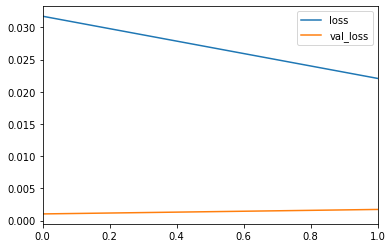

In [106]:
losses.plot()

In [0]:
test_pred = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length, n_features))

for i in range(len(test)):

  current_pred = model.predict(current_batch)[0]
  test_pred.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

In [0]:
true_p = scaler.inverse_transform(test_pred)

In [109]:
test['Pred'] = true_p

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [110]:
test

,Sales,Pred
DATE,,
2018-05-01,23764,20312.427172
2018-06-01,21589,20380.514663
2018-07-01,21919,20381.977462
2018-08-01,23381,20301.388863
2018-09-01,20260,20210.840586
2018-10-01,21473,20092.560683
2018-11-01,25831,19989.780545
2018-12-01,34706,19866.838071
2019-01-01,16410,19697.453764


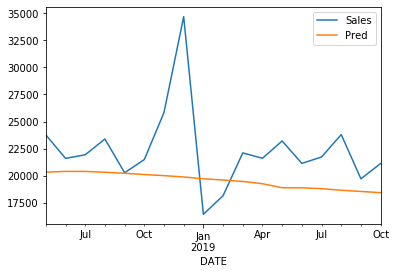

In [111]:
test.plot()